<h1 align=center><font size = 10> k-Means </font></h1>

In this notebook, we try to practice one of the most popular algorithms in Clustering that we learned in this course: k-Means algorithm. 

We load a dataset using Pandas library and apply k-Means to explore information from data.
Lets first load required libraries:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

def showandtell(title=None):
  plt.show()

A convenience function for you to use:

In [2]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [3]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()

    print("\n  Cluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

# Mandatory part (85%  of the total score)

### About dataset

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) 

*   List item
*   List item

(CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The questions you'll be exploring in this lab assignment using K-Means are: exactly how useful is telephone metadata? It must have some use, otherwise, the government wouldn't have invested however many millions they did into it secretly collecting it from phone carriers. Also what kind of intelligence can you extract from CDR metadata besides its face value?

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records of 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!


**1. Start by loading up the dataset and taking a peek at its head. You have to convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:**

In [4]:
#TO DO:
data = pd.read_csv('CDR.csv')
data.CallDate = pd.to_datetime(data.CallDate)
data.Duration = pd.to_timedelta(data.Duration)
data.CallTime = pd.to_timedelta(data.CallTime)

data.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0 days 00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0 days 00:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0 days 00:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0 days 00:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0 days 00:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


**2. Create a distinct list of `In` phone numbers (people) and store the values in a regular python list.**

Make sure the numbers appear in your list in the same order they appear in your dataframe; but only keep a single copy of each number. [This link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html) might also be helpful.

In [5]:
#TO DO:
import numpy as np
distinct_phone=data.In.unique()
distinct_phone

array([4638472273, 1559410755, 4931532174, 2419930464, 1884182865,
       3688089071, 4555003213, 2068627935, 2894365987, 8549533077])

**3. Create a slice named `user1` that filters to _only_ include dataset records where the `In` feature (user's phone number) is equal to the first number on your unique list above, i.e., the very first number in the dataset:**

In [6]:
#TO DO:
user1 = data[data.In == distinct_phone[0]]
print("User1 Shape:", user1.shape)
user1.head()

User1 Shape: (3648, 10)


,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0 days 00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0 days 00:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0 days 00:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0 days 00:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0 days 00:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


**4. Let's go ahead and plot all the call locations for user 1 in all time:**


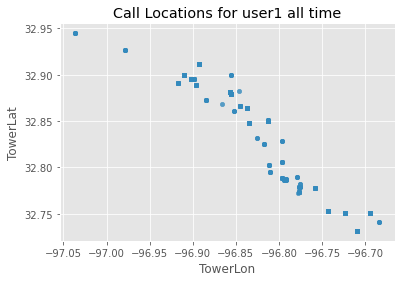

In [7]:
#TO DO:
user1.plot(kind="scatter",x="TowerLon", y="TowerLat",marker='o',alpha=0.8)
plt.title("Call Locations for user1 all time")
plt.show()

INFO: The locations map above should be too "busy" to really wrap your head around. This is where domain expertise comes into play. Your intuition can direct you by knowing people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

**5. Add more filters to the `user1` slice you created. Add bitwise logic so that you only examine records that _came in_ on weekends (sat/sun):**

In [8]:
#TO DO:
user1 = user1[(user1.DOW == "Sat") | (user1.DOW == "Sun")]
print("User1 Shape:", user1.shape)
user1.head()

User1 Shape: (1141, 10)


,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,0 days 07:16:24.736813,Sat,0 days 00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,0 days 21:18:30.053710,Sat,0 days 00:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,0 days 14:52:42.878016,Sat,0 days 00:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,0 days 16:02:09.001913,Sat,0 days 00:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,0 days 15:28:35.028554,Sat,0 days 00:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


**6. Further filter `user1` down for calls that came in either before 6am OR after 10pm (22:00:00).**

Even if you didn't convert your times from string objects to time deltas, you can still use `<` and `>` to compare the string times as long as you code them as [military time strings](https://en.wikipedia.org/wiki/24-hour_clock), eg: "06:00:00", "22:00:00": 

You may also want to review the Data Manipulation section for this. Once you have your filtered slice, print out its length:

In [9]:
#TO DO:
user1 = user1[(user1.CallTime < "06:00:00") | (user1.CallTime > "22:00:00")]
print("User1 shape:",user1.shape)
user1.head()

User1 shape: (28, 10)


,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
940,4638472273,6150928001,Incoming,2011-01-08,0 days 22:22:33.693878,Sat,0 days 00:00:35.065912,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
1875,4638472273,2145623768,Incoming,2011-01-22,0 days 22:21:27.466908,Sat,0 days 00:03:40.018320,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
6949,4638472273,5621270003,Missed,2011-04-09,0 days 22:59:23.206408,Sat,0 days 00:03:06.567364,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
7468,4638472273,7756914135,Incoming,2011-04-17,0 days 05:15:40.205917,Sun,0 days 00:02:09.984993,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
9753,4638472273,7922223441,Incoming,2011-05-21,0 days 05:08:20.121145,Sat,0 days 00:01:30.059591,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417


**7. Visualize the dataframe with a scatter plot as a sanity check.**

Since you're [familiar with maps](https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude), you know well that your X-Coordinate should be Longitude, and your Y coordinate should be the tower Latitude. Check the dataset headers for proper column feature names.
 
At this point, you don't yet know exactly where the user is located just based on the cell phone tower position data; but considering the below are for Calls that arrived in the twilight hours of weekends, it's likely that wherever they are bunched up is probably near where the caller's residence:

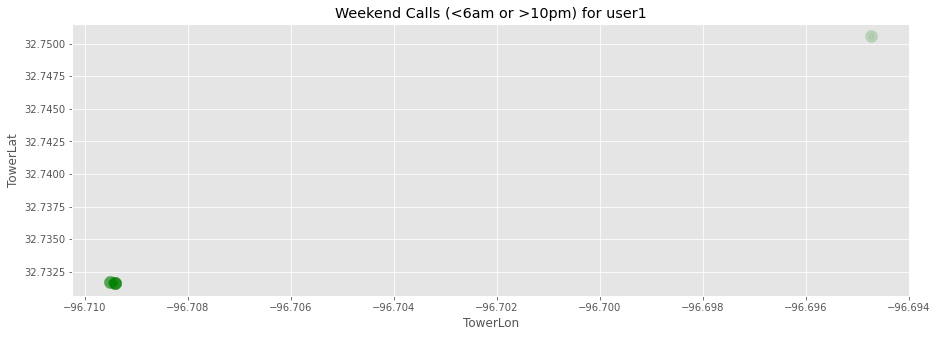

In [10]:
#TO DO:
user1.plot(kind="scatter",x="TowerLon", y="TowerLat",marker='o',c='g',alpha=0.1,figsize=(15,5),linewidth=8)
plt.title('Weekend Calls (<6am or >10pm) for user1')
plt.show()

**8. Run K-Means on that dataframe with `K=2` then print out the Cluster Info using clusterInfo function**, with the goal being that one of the centroids will sweep up the annoying outliers; and the other will zero in on the user's approximate home location. Or rather the location of the cell tower closest to their home.....

Be sure to only feed in Lat and Lon coordinates to the KMeans algorithm since none of the other data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required.

In [11]:
#TO DO:
from sklearn.cluster import KMeans
x = user1[['TowerLon', 'TowerLat']]
model = KMeans(n_clusters=2)
model.fit(x)
    
clusterInfo(model)

Cluster Analysis Inertia:  1.1304346153788861e-07
------------------------------------------

  Cluster  0
    Centroid  [-96.70944573  32.73164942]
    #Samples  26

  Cluster  1
    Centroid  [-96.694722  32.750556]
    #Samples  2


**9. Add centroid locations onto your scatter plot. Use a distinguishable marker and color.**

Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.

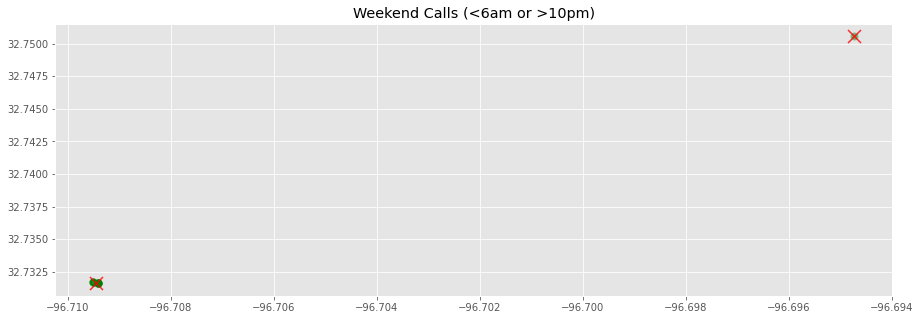

centroids x: [-96.70944573 -96.694722  ]
centroids y: [32.73164942 32.750556  ]


In [12]:
centroids = model.cluster_centers_ # calculate centroids

fig=plt.figure(figsize=(15,5))
plt.scatter(data=user1,x='TowerLon', y='TowerLat',c='g',marker='o',alpha=0.2,linewidths=2)
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker='x', c='r', alpha=0.8,s=169)
plt.title('Weekend Calls (<6am or >10pm)')
plt.show()

print ("centroids x:",centroids[:,0])
print ("centroids y:",centroids[:,1])

**10. Now that you have a system in place, repeat the above steps (4, 8, and 9) for all 10 individuals in the dataset**. 

You might want to use a for-loop unless you enjoy copying and pasting:

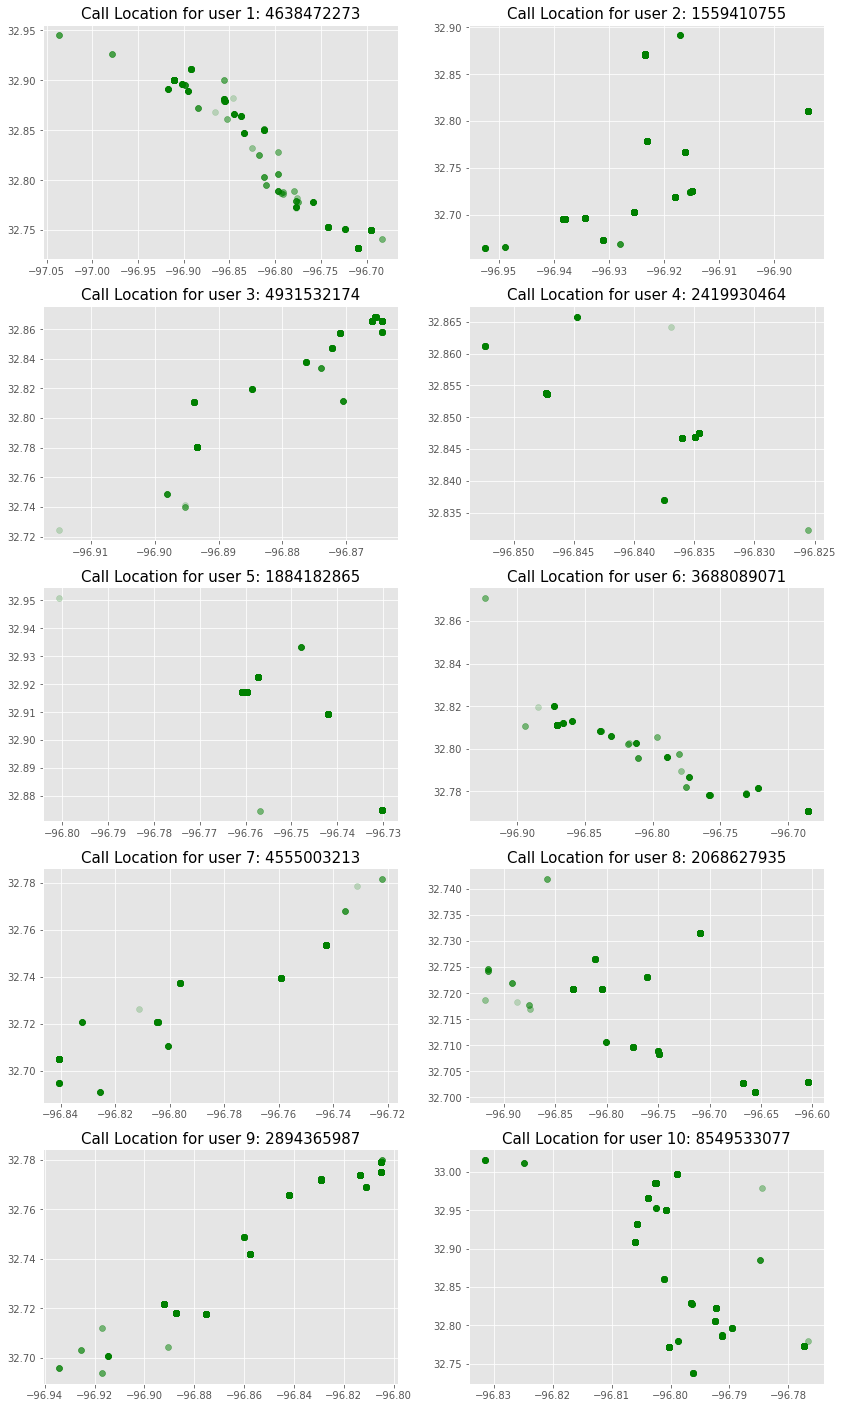

In [13]:
# step 4: plot call location of each user in all time:
cols = 2
rows = round(distinct_phone.shape[0]/cols)
f = plt.figure(figsize=(14,5*rows))

for i,user in enumerate(distinct_phone):
    users = data[data.In == distinct_phone[i]]
    
    figure=[f,rows,cols, i+1]
    ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.scatter(data=users,x='TowerLon', y='TowerLat',c='g',marker='o',alpha=0.2)
    plt.title("Call Location for user "+ str(i+1)+": "+ str(user),{'fontsize':15})
    
plt.show()

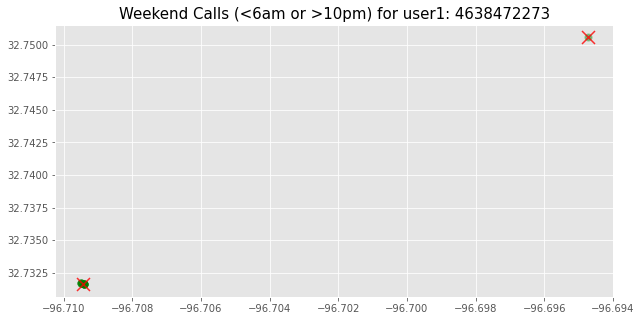

Cluster Analysis Inertia:  1.1304346153788861e-07
------------------------------------------

  Cluster  0
    Centroid  [-96.70944573  32.73164942]
    #Samples  26

  Cluster  1
    Centroid  [-96.694722  32.750556]
    #Samples  2


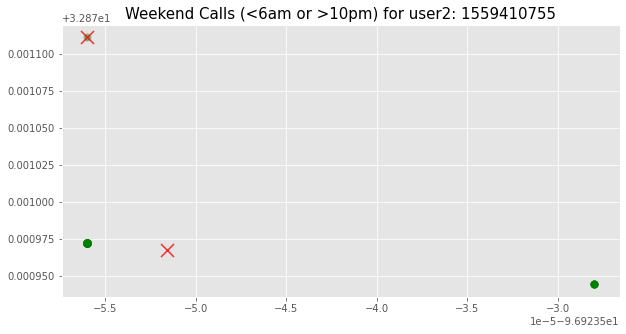

Cluster Analysis Inertia:  2.1113663366881182e-08
------------------------------------------

  Cluster  0
    Centroid  [-96.92355156  32.87096756]
    #Samples  101

  Cluster  1
    Centroid  [-96.923556  32.871111]
    #Samples  2


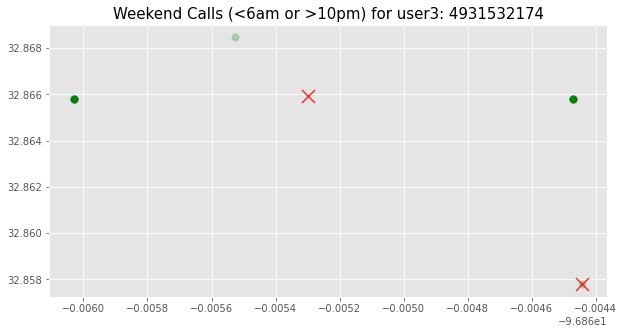

Cluster Analysis Inertia:  1.9522045272610653e-05
------------------------------------------

  Cluster  0
    Centroid  [-96.865298    32.86592718]
    #Samples  22

  Cluster  1
    Centroid  [-96.864444  32.857778]
    #Samples  1


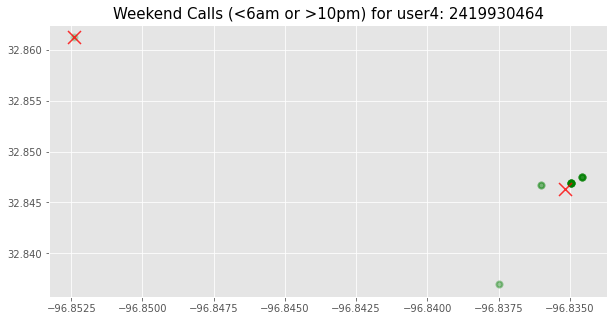

Cluster Analysis Inertia:  0.00020962809096294443
------------------------------------------

  Cluster  0
    Centroid  [-96.83515822  32.84635163]
    #Samples  27

  Cluster  1
    Centroid  [-96.852389  32.861222]
    #Samples  1


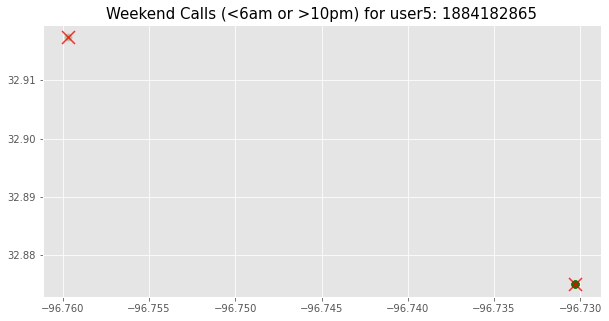

Cluster Analysis Inertia:  0.0
------------------------------------------

  Cluster  0
    Centroid  [-96.730278  32.875   ]
    #Samples  22

  Cluster  1
    Centroid  [-96.759694  32.917333]
    #Samples  1


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  del sys.path[0]


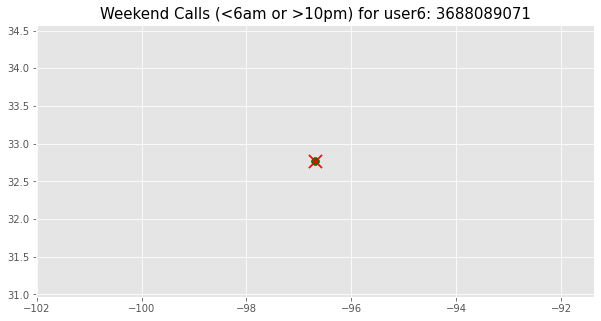

Cluster Analysis Inertia:  0.0
------------------------------------------

  Cluster  0
    Centroid  [-96.685556  32.770833]
    #Samples  18

  Cluster  1
    Centroid  [-96.685556  32.770833]
    #Samples  0


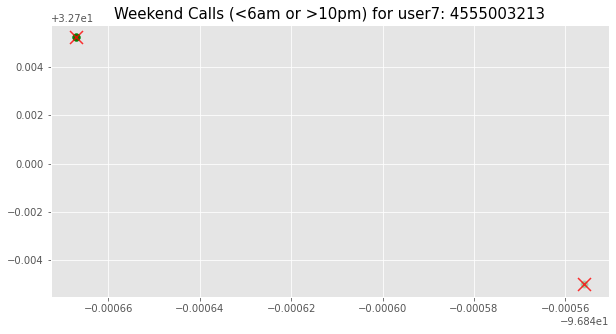

Cluster Analysis Inertia:  0.0
------------------------------------------

  Cluster  0
    Centroid  [-96.840667  32.705222]
    #Samples  11

  Cluster  1
    Centroid  [-96.840556  32.695   ]
    #Samples  1


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  del sys.path[0]


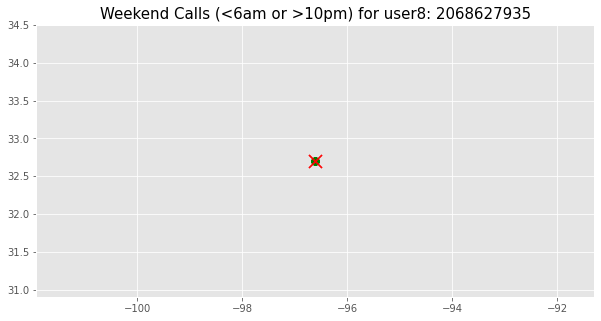

Cluster Analysis Inertia:  1.5557538194652854e-58
------------------------------------------

  Cluster  0
    Centroid  [-96.604444  32.703056]
    #Samples  50

  Cluster  1
    Centroid  [-96.604444  32.703056]
    #Samples  0


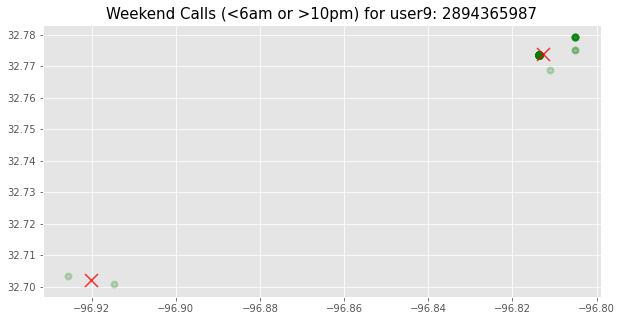

Cluster Analysis Inertia:  0.0009926468224979467
------------------------------------------

  Cluster  0
    Centroid  [-96.81277401  32.77401172]
    #Samples  106

  Cluster  1
    Centroid  [-96.920139  32.702   ]
    #Samples  2


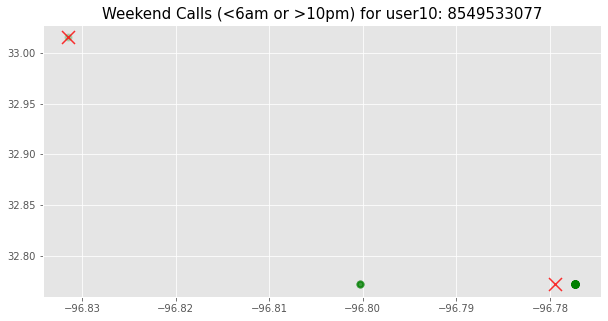

Cluster Analysis Inertia:  0.0028743288811454095
------------------------------------------

  Cluster  0
    Centroid  [-96.77946848  32.7722949 ]
    #Samples  63

  Cluster  1
    Centroid  [-96.831472  33.01525 ]
    #Samples  1


In [14]:
# step 8 & 9: built model and plot call location with centroids at weekend for each users

for i,user in enumerate(distinct_phone):
    # slice data
        userData = data[data.In == user]
        userData = userData[(userData.DOW == "Sat") | (userData.DOW == "Sun")]
        userData = userData[(userData.CallTime < "06:00:00") | (userData.CallTime > "22:00:00")]
        
    # built & fit model:
        from sklearn.cluster import KMeans
        x = userData[['TowerLon', 'TowerLat']]
        model = KMeans(n_clusters=2)
        model.fit(x)
    
    #Print and plot the centroids...
        centroids = model.cluster_centers_ 
        
        fig = plt.figure(figsize=(10,5))
        
        plt.scatter(data=userData,x='TowerLon', y='TowerLat',c='g',marker='o',alpha=0.2,linewidths=2)
        plt.scatter(x=centroids[:,0], y=centroids[:,1], marker='x', c='r', alpha=0.8,s=169)
        plt.title("Weekend Calls (<6am or >10pm) for user"+ str(i+1)+": "+ str(user),{'fontsize':15})
        plt.show()
        
        clusterInfo(model)

**11. Alter your slice from user1, so that it includes only Weekday (Mon-Fri) values and before 5pm:**

The idea is that the call was placed before 5pm. From Midnight-730a, the user is probably sleeping and won't call/wake up to take a call. There should be a brief time in the morning during their commute to work, then they'll spend the entire day at work. So the assumption is that most of the time is spent either at work or at the second, at home:
        

In [15]:
#TO DO:
user1= data[data.In == distinct_phone[0]]
user1_weekdays_daytime = user1[(user1.DOW != "Sat") & (user1.DOW != "Sun")]
user1_weekdays_daytime = user1_weekdays_daytime[(user1_weekdays_daytime.CallTime <"17:00:00")]

In [16]:
print("user1_weekdays_daytime:",user1_weekdays_daytime.shape)
user1_weekdays_daytime.head()

user1_weekdays_daytime: (1405, 10)


,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
197,4638472273,5481755331,Incoming,2010-12-28,0 days 16:20:11.532130,Tue,0 days 00:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
200,4638472273,8180005891,Incoming,2010-12-28,0 days 15:27:51.105337,Tue,0 days 00:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
248,4638472273,8180005891,Missed,2010-12-29,0 days 09:13:35.198987,Wed,0 days 00:02:10.574446,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
249,4638472273,2145623768,Incoming,2010-12-29,0 days 06:02:11.319738,Wed,0 days 00:04:34.436752,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
250,4638472273,8068555700,Incoming,2010-12-29,0 days 13:54:14.724722,Wed,0 days 00:03:31.297111,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389


**12. Plot the Cell Towers the above data frame:**


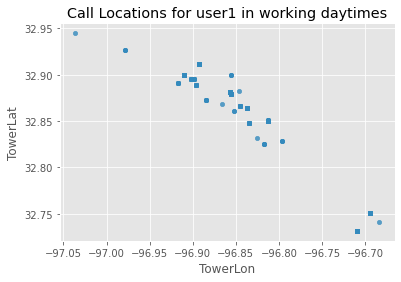

In [17]:
user1_weekdays_daytime.plot(kind="scatter",x="TowerLon", y="TowerLat",marker='o',alpha=0.8)
plt.title("Call Locations for user1 in working daytimes")
plt.show()

**13. Complete the doKmeans function:**

In [49]:
#TO DO:
def doKMeans(data, num_clusters=0):
    # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
    # data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
    # no feature scaling is required. Print out the centroid locations and add them onto your scatter
    # plot. Use a distinguishable marker and color.
    #
    # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first). This is part
    # of your domain expertise. Also, *YOU* need to create, initialize (and return) the variable named
    # `model` here, which will be a SKLearn K-Means model for this to work:
    
    # .. your code here ..
    x = data[['TowerLat', 'TowerLon']]
    model = KMeans(n_clusters= num_clusters)
    model.fit(x)
    centroids= model.cluster_centers_
        
    fig = plt.figure(figsize=(7,5))
    plt.scatter(data=data,x='TowerLon', y='TowerLat',c='g',marker='o',alpha=0.2,linewidths=2)
    plt.scatter(centroids[:,1], centroids[:,0], marker='x', c='r', alpha=0.8, s=169)
    plt.show()
    
    return model

**14. Let's tun K-Means with `K=3`using doKMeans function for that dataframe (user1 on weekdays in daytime). Then print out the cluster info using clusterInfo function:**

There should only be two areas of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another).

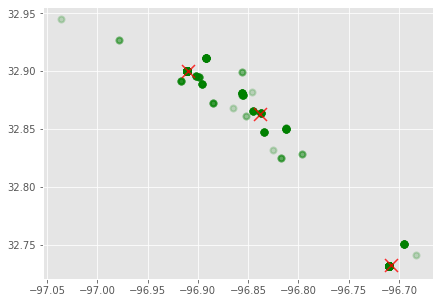

Cluster Analysis Inertia:  0.1589106952378091
------------------------------------------

  Cluster  0
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  1
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


In [50]:
#TO DO:
model_2 = doKMeans(data=user1_weekdays_daytime,num_clusters=3)
clusterInfo(model_2)

**15. Print out the mean `CallTime` value for the samples belonging to the cluster with the LEAST samples attached to it.** 

If our logic is correct, the cluster with the MOST samples will be work. The cluster with the 2nd most samples will be home. And the `K=3` cluster with the least samples should be somewhere in between the two. What time, on average, is the user in between home and work, between midnight and 5pm?

In [51]:
#TO DO:
result=clusterWithFewestSamples(model_2)
midWaySamples = user1_weekdays_daytime[result]
print("Its Waypoint Time: ", midWaySamples.CallTime.mean())


  Cluster With Fewest Samples:  2
Its Waypoint Time:  0 days 07:49:53.168115942


**16. Let's visualize the results by drawing the X's for the cluster centers combined with location plot:**


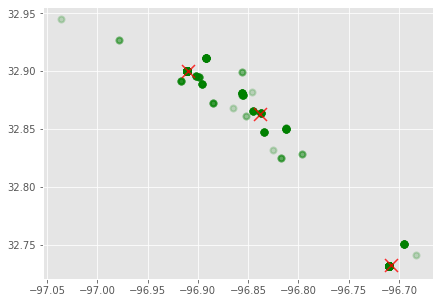

KMeans(n_clusters=3)

In [52]:
doKMeans(data=user1_weekdays_daytime,num_clusters=3)

# Adanved part (15%  of the total score)

**17. Now that you have a system in place, repeat the the steps 12, 14 and 16 for all 10 individuals in the dataset.**

___________________________________
***Weekday call centroids for user1: 4638472273


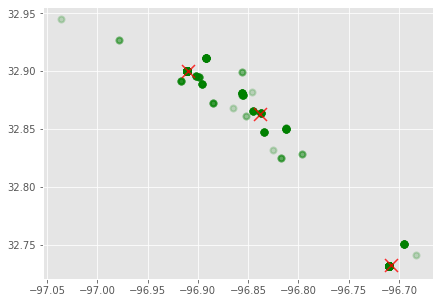

Cluster Analysis Inertia:  0.1589106952378091
------------------------------------------

  Cluster  0
    Centroid  [ 32.73323174 -96.70816184]
    #Samples  306

  Cluster  1
    Centroid  [ 32.9000009  -96.90951639]
    #Samples  959

  Cluster  2
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140
___________________________________
***Weekday call centroids for user2: 1559410755


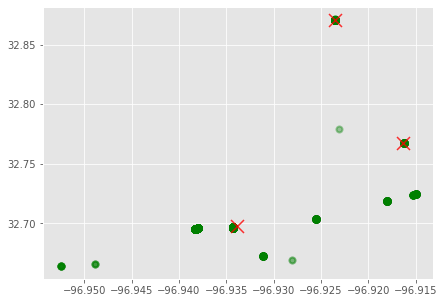

Cluster Analysis Inertia:  0.3211577281834786
------------------------------------------

  Cluster  0
    Centroid  [ 32.87096795 -96.92355104]
    #Samples  921

  Cluster  1
    Centroid  [ 32.69740885 -96.93391542]
    #Samples  3356

  Cluster  2
    Centroid  [ 32.7674931  -96.91638645]
    #Samples  125
___________________________________
***Weekday call centroids for user3: 4931532174


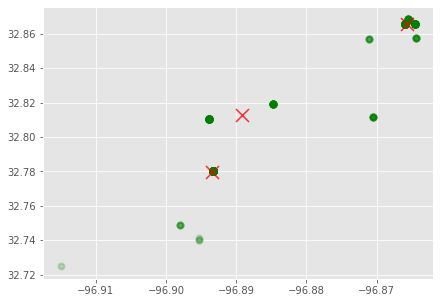

Cluster Analysis Inertia:  0.0195509698781168
------------------------------------------

  Cluster  0
    Centroid  [ 32.77992299 -96.89338791]
    #Samples  846

  Cluster  1
    Centroid  [ 32.86562866 -96.86563953]
    #Samples  197

  Cluster  2
    Centroid  [ 32.81309497 -96.88911725]
    #Samples  88
___________________________________
***Weekday call centroids for user4: 2419930464


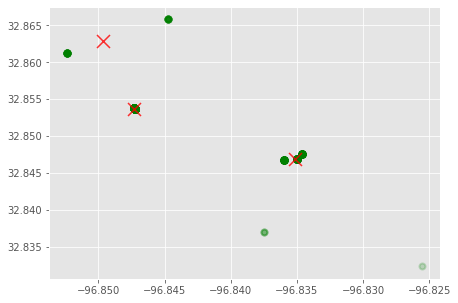

Cluster Analysis Inertia:  0.0013348266129960288
------------------------------------------

  Cluster  0
    Centroid  [ 32.85371225 -96.8472893 ]
    #Samples  701

  Cluster  1
    Centroid  [ 32.84684682 -96.83511392]
    #Samples  241

  Cluster  2
    Centroid  [ 32.86284941 -96.849683  ]
    #Samples  34
___________________________________
***Weekday call centroids for user5: 1884182865


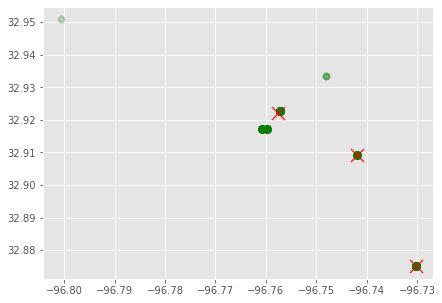

Cluster Analysis Inertia:  0.007583960196992065
------------------------------------------

  Cluster  0
    Centroid  [ 32.92195886 -96.75768121]
    #Samples  827

  Cluster  1
    Centroid  [ 32.875    -96.730278]
    #Samples  169

  Cluster  2
    Centroid  [ 32.909167 -96.741944]
    #Samples  65
___________________________________
***Weekday call centroids for user6: 3688089071


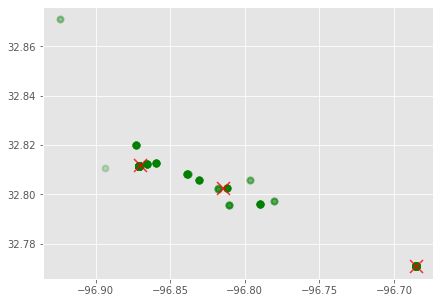

Cluster Analysis Inertia:  0.04745989075758843
------------------------------------------

  Cluster  0
    Centroid  [ 32.81198486 -96.87034706]
    #Samples  456

  Cluster  1
    Centroid  [ 32.770833 -96.685556]
    #Samples  128

  Cluster  2
    Centroid  [ 32.80241723 -96.81450799]
    #Samples  77
___________________________________
***Weekday call centroids for user7: 4555003213


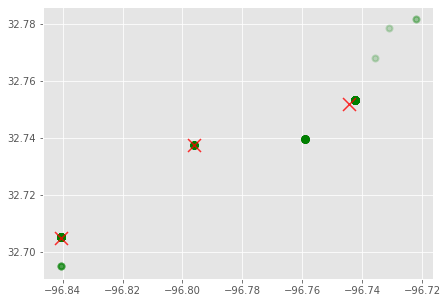

Cluster Analysis Inertia:  0.038284769227121485
------------------------------------------

  Cluster  0
    Centroid  [ 32.75203793 -96.74437494]
    #Samples  707

  Cluster  1
    Centroid  [ 32.70494423 -96.84066398]
    #Samples  184

  Cluster  2
    Centroid  [ 32.7375   -96.796111]
    #Samples  53
___________________________________
***Weekday call centroids for user8: 2068627935


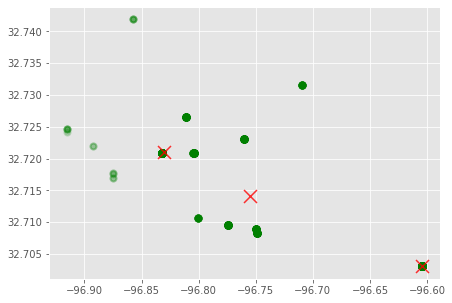

Cluster Analysis Inertia:  0.2467390423843977
------------------------------------------

  Cluster  0
    Centroid  [ 32.72097347 -96.83039184]
    #Samples  1648

  Cluster  1
    Centroid  [ 32.703056 -96.604444]
    #Samples  392

  Cluster  2
    Centroid  [ 32.71410598 -96.75520357]
    #Samples  254
___________________________________
***Weekday call centroids for user9: 2894365987


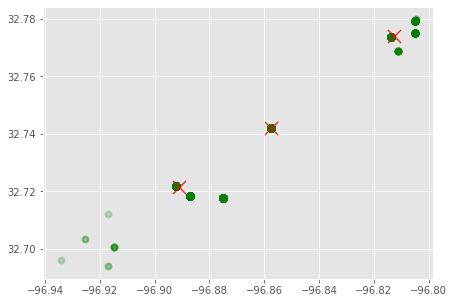

Cluster Analysis Inertia:  0.08053468509540436
------------------------------------------

  Cluster  0
    Centroid  [ 32.77396536 -96.81270407]
    #Samples  1077

  Cluster  1
    Centroid  [ 32.72145328 -96.89115458]
    #Samples  3465

  Cluster  2
    Centroid  [ 32.741889 -96.857611]
    #Samples  298
___________________________________
***Weekday call centroids for user10: 8549533077


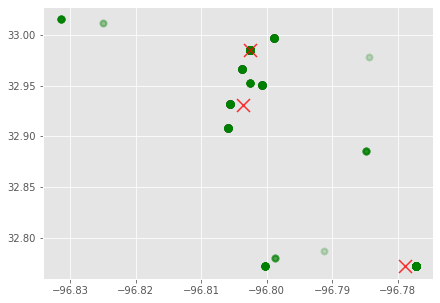

Cluster Analysis Inertia:  0.20362518379546865
------------------------------------------

  Cluster  0
    Centroid  [ 32.77240328 -96.77896656]
    #Samples  576

  Cluster  1
    Centroid  [ 32.93033402 -96.80360535]
    #Samples  304

  Cluster  2
    Centroid  [ 32.98500948 -96.80262338]
    #Samples  2170


In [69]:
# built model and plot call location with centroids at weekday for each users

for i,user in enumerate(distinct_phone):
    # slice data:
        userdata = data[data.In == distinct_phone[i]]
        userdata= userdata[(userdata.DOW != "Sat") & (userdata.DOW != "Sun")]
        userdata=userdata[(userdata.CallTime <"17:00:00")]
        
    # plot centroids:
        print("___________________________________")
        print("***Weekday call centroids for user"+ str(i+1)+": "+ str(user))
        model= doKMeans(userdata,num_clusters=3)


        clusterInfo(model)